In [5]:
include("model.jl")

para = [2.83 0.78 1.80 0.63 0.42 3.30 0.52 0.77 0.98 0.88 0.22 0.71 0.31]
m = new_model()
solve(m,para)

[1.0 0.0933844 0.0933844]
[2.0 0.0657832 0.0657832]
[3.0 0.0464966 0.0464966]
[4.0 0.0329627 0.0329627]
[5.0 0.0233842 0.0233842]
[6.0 0.0198745 0.0198745]
[7.0 0.0196216 0.0196216]
[8.0 0.0179547 0.0179547]
[9.0 0.0152532 0.0152532]
[10.0 0.0120757 0.0120757]
[11.0 0.00891432 0.00891432]
[12.0 0.00607953 0.00607953]
[13.0 0.00433997 0.00433997]
[14.0 0.0038749 0.0038749]
[15.0 0.00347551 0.00347551]
[16.0 0.00314134 0.00314134]
[17.0 0.00286617 0.00286617]
[18.0 0.0027426 0.0027426]
[19.0 0.002697 0.002697]
[20.0 0.00263983 0.00263983]
[21.0 0.00257339 0.00257339]
[22.0 0.00253773 0.00253773]
[23.0 0.00248437 0.00248437]
[24.0 0.00239309 0.00239309]
[25.0 0.00227656 0.00227656]
[26.0 0.00215561 0.00215561]
[27.0 0.00206261 0.00206261]
[28.0 0.00196842 0.00196842]
[29.0 0.0018737 0.0018737]
[30.0 0.00177904 0.00177904]
[31.0 0.00168499 0.00168499]
[32.0 0.00159202 0.00159202]
[33.0 0.00150055 0.00150055]
[34.0 0.00141095 0.00141095]
[35.0 0.00132356 0.00132356]
[36.0 0.00123862 0.00123

true

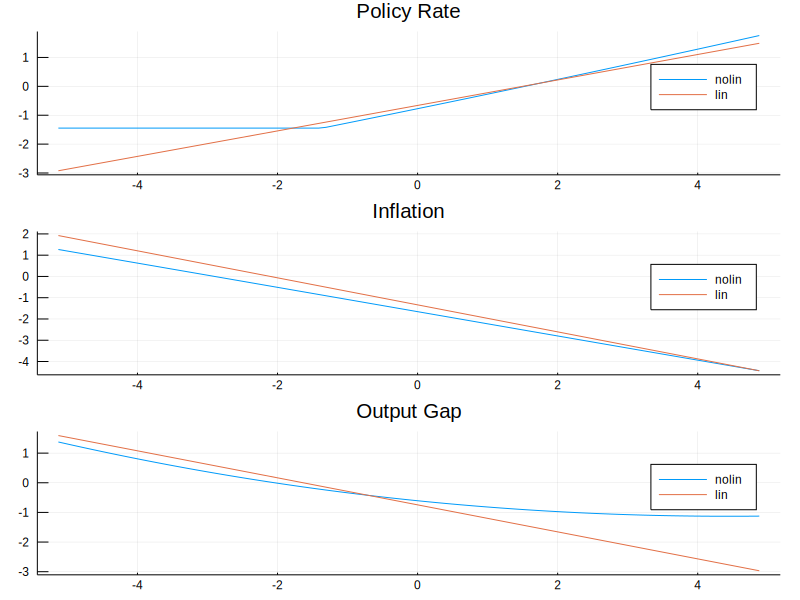

In [9]:
using Plots

include("linsol.jl")

T1,T0 = model_solution(para)

rho_g   = para[9]
rho_z   = para[10]
sigma_R = para[11]/100
sigma_g = para[12]/100
sigma_z = para[13]/100

# steady state values
ss = steadystate(para)
rnss = ss[1]
css  = ss[2]
piss = ss[3]
yss  = ss[4]
rnss = ss[5]
fcss = ss[6]
fpss = ss[7]

# set bounds
rnmin = (1-m.pctrn)*rnss
rnmax = (1+m.pctrn)*rnss
gmin = -m.mg*sigma_g/sqrt(1-rho_g^2)
gmax = m.mg*sigma_g/sqrt(1-rho_g^2)
zmin = -m.mz*sigma_z/sqrt(1-rho_z^2)
zmax = m.mz*sigma_z/sqrt(1-rho_z^2)
rmin = -m.mr*sigma_R
rmax = m.mr*sigma_R

rngrid = collect(LinRange(rnmin,rnmax,101))
ggrid = collect(LinRange(gmin,gmax,101))
zgrid = collect(LinRange(zmin,zmax,101))
rgrid = collect(LinRange(rmin,rmax,101))

rnvec_lin = zeros(101)
pivec_lin = zeros(101)
yvec_lin  = zeros(101)
cvec_lin  = zeros(101)
rnvec_nolin = zeros(101)
pivec_nolin = zeros(101)
yvec_nolin  = zeros(101)
cvec_nolin  = zeros(101)

for i = 1:101
    
    rnpast = rngrid[i]
    gnow = 0
    znow = zmin
    rnow = 0

    # for the linearized model
    endogvarm = zeros(8)
    endogvarm[3] = log.(rnpast/rnss)
    endogvarm[5] = gnow
    endogvarm[6] = znow    
    shocks = zeros(3)
    endogvar = T1*endogvarm + T0*shocks
    
    rnvec_lin[i] = endogvar[3]*100
    pivec_lin[i] = endogvar[2]*100
    yvec_lin[i] = endogvar[1]*100

    # for the nonlinear model
    endogvarm = [rnpast css piss yss rnss fcss fpss gnow znow rnow]
    shocks = zeros(3)
    endogvar = decr(endogvarm,shocks,para,m.slopecon,m.coeffcn,m.coeffpn,m.coeffcb,m.coeffpb,m.np,m.ns,m.zlbflag)
    
    rnvec_nolin[i] = log.(endogvar[5]/rnss)*100
    pivec_nolin[i] = log.(endogvar[3]/piss)*100
    yvec_nolin[i] = log.(endogvar[4]/yss)*100
    cvec_nolin[i] = log.(endogvar[2]/css)*100
    
end

plot(
    plot(log.(rngrid/rnss)*100,[rnvec_nolin rnvec_lin],title="Policy Rate"),
    plot(log.(rngrid/rnss)*100,[pivec_nolin pivec_lin],title="Inflation"),
    plot(log.(rngrid/rnss)*100,[yvec_nolin yvec_lin],title="Output Gap"),
    layout=(3,1),size=(800,600),label=["nolin" "lin"]
)